In [1]:
%matplotlib inline
import tellurium as te
import numpy as np
import lmfit   # Fitting lib
import math
import random 
import matplotlib.pyplot as plt
import model_fitting as mf

In [34]:
# Model
model = """
     A -> B; k1*A
     B -> C; k2*B
      
     A = 5;
     B = 0;
     C = 0;
     k1 = 0.1
     k2 = 0.2
"""
parameters = mf.makeParameters(constants=['k1', 'k2'])

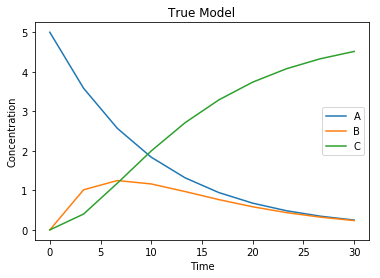

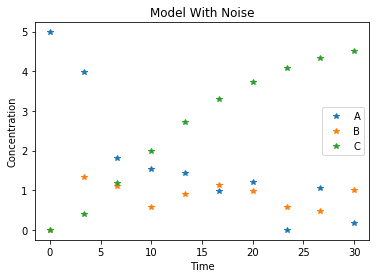

In [40]:
# Create synthetic observational data and plot it.
true_data = mf.runSimulation(model=model, num_points=10)
obs_data = mf.makeObservations(model=model, noise_std=0.5, num_points=10)
columns = ['A', 'B', 'C']
mf.plotTimeSeries(true_data, title="True Model", columns=columns)
mf.plotTimeSeries(obs_data, title="Model With Noise", is_scatter=True, columns=columns)

In [38]:
# Parameter fitting
# Illustration of parameter fitting
mf.fit(obs_data, model=model, parameters=parameters)

name,value,standard error,relative error,initial value,min,max,vary
k1,0.10270561,0.00899815,(8.76%),1,0.00000000,10.0000000,True
k2,0.21648761,0.03660162,(16.91%),1,0.00000000,10.0000000,True


In [41]:
# Cross validate to fit model
mf.crossValidate(obs_data, model=model, parameters=parameters, num_folds=3)

([Parameters([('k1',
               <Parameter 'k1', value=0.10473728834665352 +/- 0.00786, bounds=[0:10]>),
              ('k2',
               <Parameter 'k2', value=0.1811682768111761 +/- 0.0231, bounds=[0:10]>)]),
  Parameters([('k1',
               <Parameter 'k1', value=0.10025984094188034 +/- 0.0086, bounds=[0:10]>),
              ('k2',
               <Parameter 'k2', value=0.1875837725727919 +/- 0.0282, bounds=[0:10]>)]),
  Parameters([('k1',
               <Parameter 'k1', value=0.09792532982344115 +/- 0.00729, bounds=[0:10]>),
              ('k2',
               <Parameter 'k2', value=0.1966459415537608 +/- 0.027, bounds=[0:10]>)])],
 [0.9550082257729575, 0.9727385902021672, 0.9028996804274075])

## Exercise 1: Effect of Observational Data
1. Re-run the foregoing with nose_std=2.0. How do the fits change? How do the $R^2$ values change? Run the codes a few times to see the variations in the quality of fit and parameter estimates.
1. Do you get better fits if you increase the number of points?

In [57]:
# Create synthetic observational data and plot it.
num_points = 10
true_data = mf.runSimulation(model=model, num_points=num_points)
obs_data = mf.makeObservations(model=model, noise_std=2.0, num_points=num_points)
mf.crossValidate(obs_data, model=model, parameters=parameters, num_folds=3)

([Parameters([('k1',
               <Parameter 'k1', value=0.3427425861164862 +/- 0.125, bounds=[0:10]>),
              ('k2',
               <Parameter 'k2', value=0.0935091232560259 +/- 0.0207, bounds=[0:10]>)]),
  Parameters([('k1',
               <Parameter 'k1', value=0.4251175914122457 +/- 0.0222, bounds=[0:10]>),
              ('k2',
               <Parameter 'k2', value=0.07879245148212422 +/- 0.0166, bounds=[0:10]>)]),
  Parameters([('k1',
               <Parameter 'k1', value=0.2818256226140248 +/- 0.0977, bounds=[0:10]>),
              ('k2',
               <Parameter 'k2', value=0.08633733102091867 +/- 0.0168, bounds=[0:10]>)])],
 [0.5957320934432639, 0.5358275418566191, 0.054603601897660115])

## Exercise 2: Analyze a different model

     A -> B; k1*A
     B -> C; k2*B
     A -> C; k3*C
      
     A = 5;
     B = 0;
     C = 0;
     k1 = 0.1
     k2 = 0.2
     k3 = 0.3
     
 1. Create synthetic data for this model.
 1. How do the dynamics of the second model differ from the first?
 1. Do cross validation using this model and obtain $R^2$ values and parameter estimates for 2 folds? 3 folds?

In [67]:
# A model to analyzie
model2 = """
     A -> B; k1*A
     B -> C; k2*B
     A -> C; k3*C
      
     A = 5;
     B = 0;
     C = 0;
     k1 = 0.1
     k2 = 0.2
     k3 = 0.05
"""
parameters2 = mf.makeParameters(constants=['k1', 'k2', 'k3'])

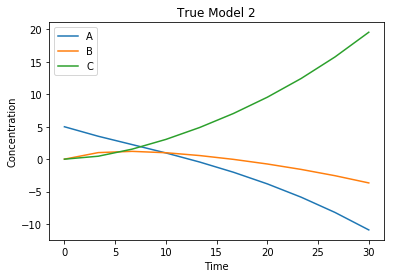

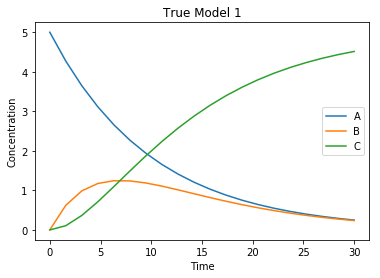

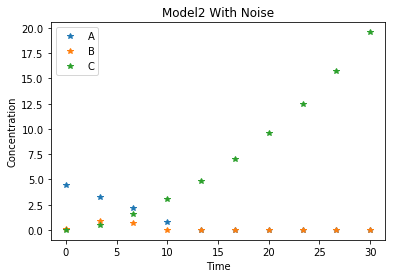

In [68]:
# Create synthetic observational data and plot it.
true_data2 = mf.runSimulation(model=model2, num_points=10)
obs_data2 = mf.makeObservations(model=model2, noise_std=0.5, num_points=10)
columns = ['A', 'B', 'C']
mf.plotTimeSeries(true_data2, title="True Model 2", columns=columns)
mf.plotTimeSeries(true_data, title="True Model 1", columns=columns)
mf.plotTimeSeries(obs_data2, title="Model2 With Noise", is_scatter=True, columns=columns)

In [69]:
# Illustration of parameter fitting
mf.fit(obs_data2, model=model2, parameters=parameters2)

name,value,standard error,relative error,initial value,min,max,vary
k1,0.17805896,0.01763582,(9.90%),1,0.00000000,10.0000000,True
k2,0.13571040,0.00899024,(6.62%),1,0.00000000,10.0000000,True
k3,0.08127326,0.00520968,(6.41%),1,0.00000000,10.0000000,True


In [70]:
# Cross validate to fit model
mf.crossValidate(obs_data2, model=model2, parameters=parameters2, num_folds=3)

([Parameters([('k1',
               <Parameter 'k1', value=0.31348834064545195 +/- 0.306, bounds=[0:10]>),
              ('k2',
               <Parameter 'k2', value=5.690700786820102e-05 +/- 0.000128, bounds=[0:10]>),
              ('k3',
               <Parameter 'k3', value=0.5962331597777948 +/- 0.12, bounds=[0:10]>)]),
  Parameters([('k1',
               <Parameter 'k1', value=0.18263985488662648 +/- 0.0711, bounds=[0:10]>),
              ('k2',
               <Parameter 'k2', value=0.13124709222259112 +/- 0.0711, bounds=[0:10]>),
              ('k3',
               <Parameter 'k3', value=0.08198884138817975 +/- 0.00711, bounds=[0:10]>)]),
  Parameters([('k1',
               <Parameter 'k1', value=0.18210271221863972 +/- 0.0694, bounds=[0:10]>),
              ('k2',
               <Parameter 'k2', value=0.13208669437921594 +/- 0.0674, bounds=[0:10]>),
              ('k3',
               <Parameter 'k3', value=0.0818306948558789 +/- 0.00718, bounds=[0:10]>)])],
 [-370551.6177526230

## Exercise 3: Fitting the Wrong Model
1. Create synthetic data using the second model.
1. Fit the first model to these data.
1. How do the $R^2$ values from cross validation compare with those when we use the correct model? How accurately are k1 and k2 estimated?
1. What happens to parameter estimates if k3 = 0.1?

In [71]:
# Create synthetic observational data and plot it.
num_points = 10
obs_data3 = mf.makeObservations(model=model2, noise_std=0.5, num_points=num_points)

In [72]:
# Illustration of parameter fitting
mf.fit(obs_data3, model=model, parameters=parameters)

name,value,standard error,relative error,initial value,min,max,vary
k1,0.21525148,0.22377014,(103.96%),1,0.00000000,10.0000000,True
k2,0.40321591,0.74733199,(185.34%),1,0.00000000,10.0000000,True


In [73]:
# Cross validate to fit model
mf.crossValidate(obs_data3, model=model, parameters=parameters, num_folds=3)

([Parameters([('k1',
               <Parameter 'k1', value=0.2079537306738477 +/- 0.208, bounds=[0:10]>),
              ('k2',
               <Parameter 'k2', value=0.43904693603996403 +/- 0.847, bounds=[0:10]>)]),
  Parameters([('k1',
               <Parameter 'k1', value=0.23282198458205838 +/- 0.398, bounds=[0:10]>),
              ('k2',
               <Parameter 'k2', value=0.3237383617377809 +/- 0.72, bounds=[0:10]>)]),
  Parameters([('k1',
               <Parameter 'k1', value=0.20898955629135796 +/- 0.27, bounds=[0:10]>),
              ('k2',
               <Parameter 'k2', value=0.5238245470618119 +/- 1.57, bounds=[0:10]>)])],
 [0.45212941608709456, 0.5961155999755774, 0.5153303448403457])